# Task 2.4 - Optimizing Random Forest for ClimateWins

# The Scripts Contents

1. Importing Libraries and Data

2. Data Wrangling - Decade

3. Data Split

4. Random Forest Model Grid Search

5. Random forest with best parameters - Decade

6. Uncovering Feature Importance - Decade

# 1. Importing Libraries and Data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from numpy import unique
from numpy import reshape
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [39]:
path = r'/home/joshua/Downloads'

In [40]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [41]:
x = pd.read_csv(os.path.join(path, 'Original Data X_cleaned.csv'))

In [42]:
df1 = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [43]:
x.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [44]:
x.shape

(22950, 137)

In [45]:
df1.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df1.shape

(22950, 16)

# 2. Data Wrangling - Decade
Reduce data to one decade. Chosen decade: 2000s (2000-2009).
The data should be regular, with the same number of entries for each station.

In [47]:
# Reduce observations dataset to 2010's

dfdecade = x[(x['DATE'].astype(str).str[:4] >= '2000') & (x['DATE'].astype(str).str[:4] <= '2009')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,7,0.88,1.0275,0.24,0.00,0.0,-2.5,-3.2,-0.4,3,0.92,1.0268,0.52,0.00,3.7,-4.9,-8.4,-0.7,7,0.97,1.0240,0.14,0.10,0.0,6.1,3.5,8.1,8,0.92,1.0240,0.12,0.22,0.0,4.2,2.5,6.9,7,0.94,1.0245,0.18,0.00,0.4,7.0,4.9,10.8,8,0.93,1.0237,0.12,0.13,0.0,3.5,1.5,5.0,6,0.83,1.0294,0.57,0.00,5.2,-4.8,-9.1,-1.3,8,0.98,1.0251,0.12,0.17,0.0,5.6,4.1,6.9,1,0.80,1.0282,1.02,0.00,8.4,5.4,0.3,10.4,8,0.91,1.0286,0.20,0.20,0.0,1.7,-0.5,2.6,7,0.94,1.0130,-0.03,0.60,0.0,-5.0,-8.6,-3.2,7,0.89,1.0420,0.82,1.34,0.0,-15.2,-17.0,-13.4,8,0.94,1.0163,0.05,0.17,0.0,-2.3,-9.3,0.7,6,0.89,1.0235,0.22,0.10,0.7,6.6,2.1,11.0
14611,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,0.85,1.0303,0.25,0.00,0.0,-1.2,-2.6,-0.3,8,0.94,1.0297,0.14,0.00,0.4,-3.6,-5.0,-1.9,8,0.97,1.0267,0.08,0.00,0.0,7.3,5.4,8.7,6,0.87,1.0283,0.19,0.00,0.7,6.5,2.7,7.9,7,0.89,1.0253,0.20,0.02,0.7,7.9,5.0,11.5,6,0.92,1.0290,0.33,0.00,2.9,2.3,0.3,4.7,6,0.76,1.0310,0.59,0.00,5.0,-0.9,-4.9,2.0,7,0.95,1.0286,0.14,0.00,0.0,6.2,4.2,7.5,0,0.78,1.0279,1.03,0.00,8.5,5.0,0.3,9.6,6,0.90,1.0318,0.66,0.00,6.1,1.9,-0.2,5.8,6,0.94,1.0076,-0.03,0.00,1.6,-0.8,-6.7,2.4,5,0.86,1.0467,0.60,0.39,2.8,-13.7,-15.0,-12.3,8,0.94,1.0108,0.05,0.20,0.0,1.3,0.5,2.0,8,0.92,1.0177,0.13,0.42,0.0,9.6,7.3,10.6
14612,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,5,0.84,1.0310,0.50,0.

In [48]:
# Reduce answers dataset to 2000's

df1_decade = df1[(df1['DATE'].astype(str).str[:4] >= '2000') & (df1['DATE'].astype(str).str[:4] <= '2009')]
df1_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,20000102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,20000103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,20000104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,20000105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18259,20091228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18260,20091229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18261,20091230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)
dfdecade.shape # observations dataset has the correct shape

(3653, 135)

In [50]:
df1_decade.drop(['DATE'], axis=1, inplace=True)
df1_decade.shape # predictions dataset has the correct shape

(3653, 15)

In [51]:
X = dfdecade

In [52]:
# Turn X and y from a df to arrays

X = np.array(dfdecade)
y = np.array(df1_decade)

In [53]:
X.shape

(3653, 135)

In [54]:
y.shape

(3653, 15)

# 3. Data Split

In [55]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [56]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


# 4. Random Forest Model Grid Search

In [57]:
# Create a RF classifier
clf = RandomForestClassifier()  

In [58]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [59]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.406 total time=   1.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.406 total time=   1.1s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] EN

In [60]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6250456370938299


# 5. Random forest with best parameters - Decade

In [61]:
# Create a RF classifier with the best results from above
clf2 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=50, min_samples_leaf=2, min_samples_split=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf2.fit(X_train, y_train)

RandomForestClassifier(max_features=50, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200)

In [62]:
# Perform predictions on the test dataset
y_pred = clf2.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6695842450765864


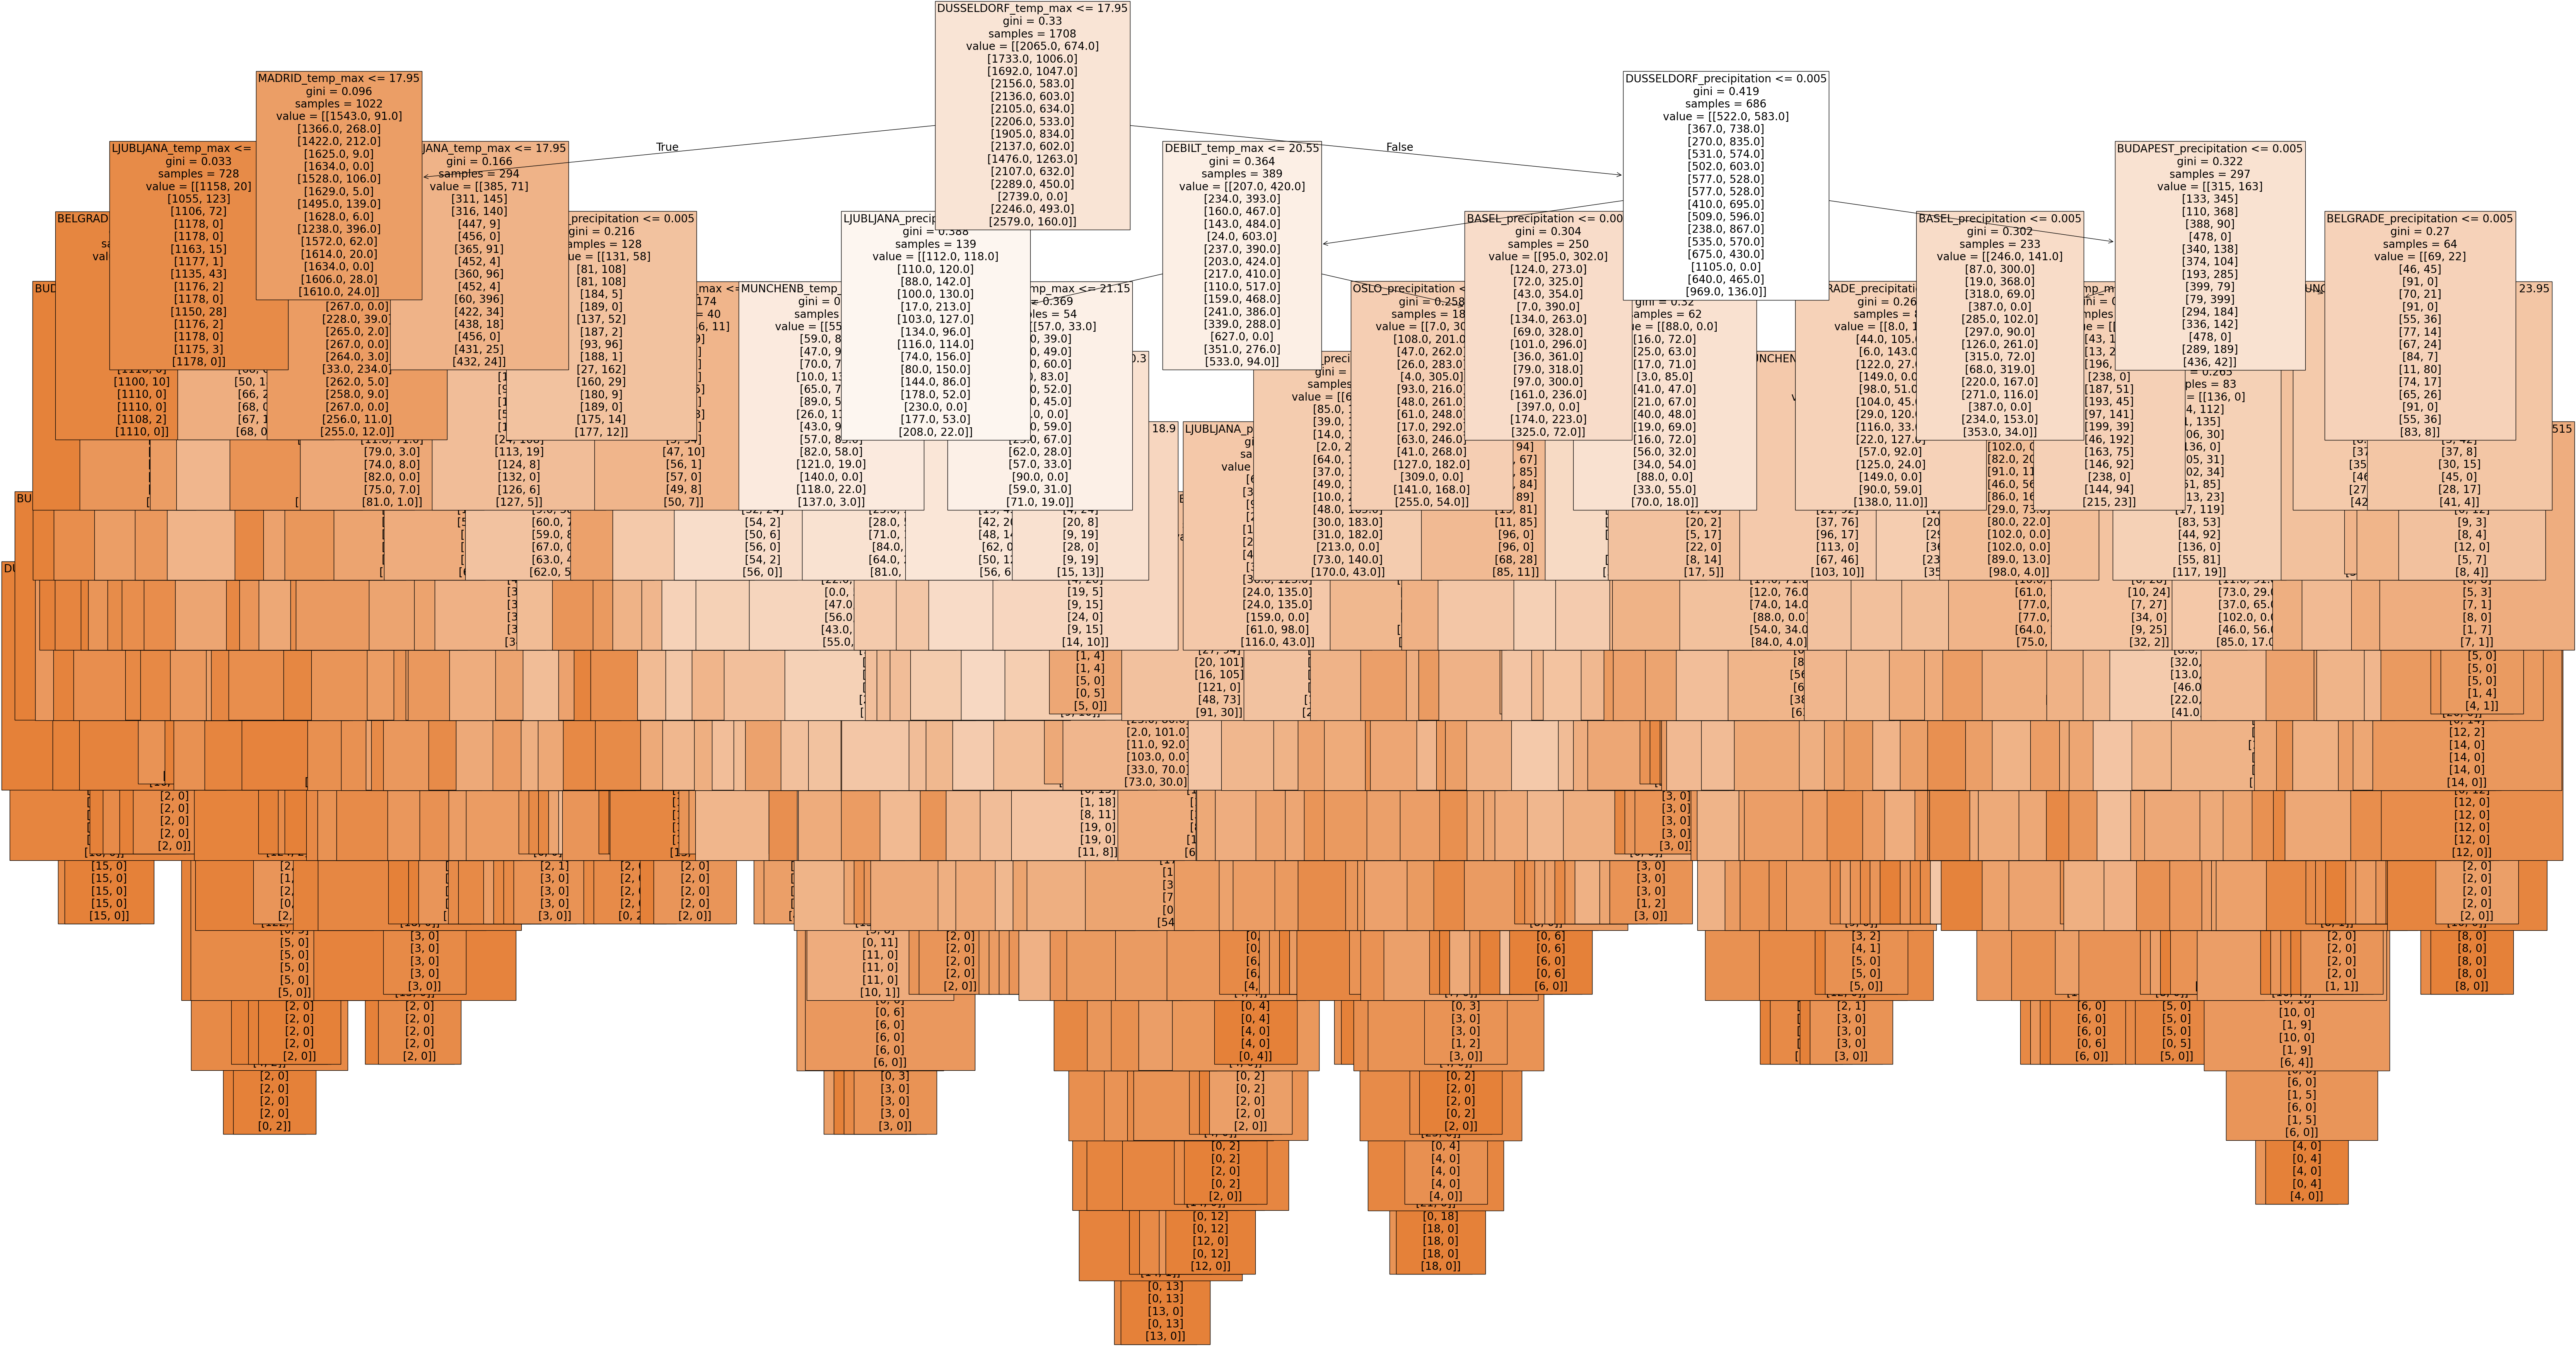

In [63]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf2.estimators_[15], fontsize = 20, feature_names = dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True);

# 6. Uncovering Feature Importances

In [64]:
# Retrieve feature importances from the trained model

newarray = clf2.feature_importances_
print(clf2.feature_importances_.shape)
newarray

(135,)


array([0.00094294, 0.00150612, 0.00141723, 0.00238292, 0.0247777 ,
       0.00244494, 0.00243095, 0.00094367, 0.03018485, 0.00192508,
       0.00209098, 0.0013556 , 0.00172209, 0.03368398, 0.00310008,
       0.00328976, 0.00114023, 0.00842691, 0.00127312, 0.00188146,
       0.0014804 , 0.00195389, 0.02090045, 0.00248707, 0.00969007,
       0.00122102, 0.020992  , 0.00171768, 0.00120106, 0.00174377,
       0.00198453, 0.02176296, 0.00251515, 0.00145925, 0.00123384,
       0.039155  , 0.00242222, 0.00120123, 0.00146427, 0.00173057,
       0.04197957, 0.00302877, 0.00790752, 0.00119897, 0.13584437,
       0.00117622, 0.00242197, 0.00209729, 0.00220194, 0.01375343,
       0.00246683, 0.0019523 , 0.00113216, 0.00799109, 0.00263718,
       0.00159021, 0.0015868 , 0.00156329, 0.01553491, 0.00205953,
       0.00677689, 0.00124458, 0.02269671, 0.00198848, 0.0021278 ,
       0.00130991, 0.00236356, 0.03223836, 0.00256018, 0.00428842,
       0.0012511 , 0.01232852, 0.00269266, 0.00124014, 0.00169

In [65]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00094294, 0.00150612, 0.00141723, 0.00238292, 0.0247777 ,
         0.00244494, 0.00243095, 0.00094367, 0.03018485],
        [0.00192508, 0.00209098, 0.0013556 , 0.00172209, 0.03368398,
         0.00310008, 0.00328976, 0.00114023, 0.00842691],
        [0.00127312, 0.00188146, 0.0014804 , 0.00195389, 0.02090045,
         0.00248707, 0.00969007, 0.00122102, 0.020992  ],
        [0.00171768, 0.00120106, 0.00174377, 0.00198453, 0.02176296,
         0.00251515, 0.00145925, 0.00123384, 0.039155  ],
        [0.00242222, 0.00120123, 0.00146427, 0.00173057, 0.04197957,
         0.00302877, 0.00790752, 0.00119897, 0.13584437],
        [0.00117622, 0.00242197, 0.00209729, 0.00220194, 0.01375343,
         0.00246683, 0.0019523 , 0.00113216, 0.00799109],
        [0.00263718, 0.00159021, 0.0015868 , 0.00156329, 0.01553491,
         0.00205953, 0.00677689, 0.00124458, 0.02269671],
        [0.00198848, 0.0021278 , 0.00130991, 0.00236356, 0.03223836,
         0.00256018, 0.00428842, 0.0012511

In [66]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.06703132, 0.05673472, 0.06187947, 0.07277324, 0.1967775 ,
       0.03519322, 0.05569009, 0.06045633, 0.1513263 , 0.07433804,
       0.07073746, 0.03786717, 0.01147785, 0.03085824, 0.01685905])

In [67]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [71]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [72]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [73]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

DEBILT        0.196777
BUDAPEST      0.151326
MUNCHENB      0.074338
KASSEL        0.072773
BASEL         0.070737
STOCKHOLM     0.067031
MADRID        0.061879
BELGRADE      0.060456
DUSSELDORF    0.056735
SONNBLICK     0.055690
MAASTRICHT    0.037867
HEATHROW      0.035193
VALENTIA      0.030858
LJUBLJANA     0.016859
OSLO          0.011478
dtype: float64

In [74]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['STOCKHOLM', 'DUSSELDORF', 'MADRID', 'KASSEL', 'DEBILT', 'HEATHROW', 'SONNBLICK', 'BELGRADE', 'BUDAPEST', 'MUNCHENB', 'BASEL', 'MAASTRICHT', 'OSLO', 'VALENTIA', 'LJUBLJANA']


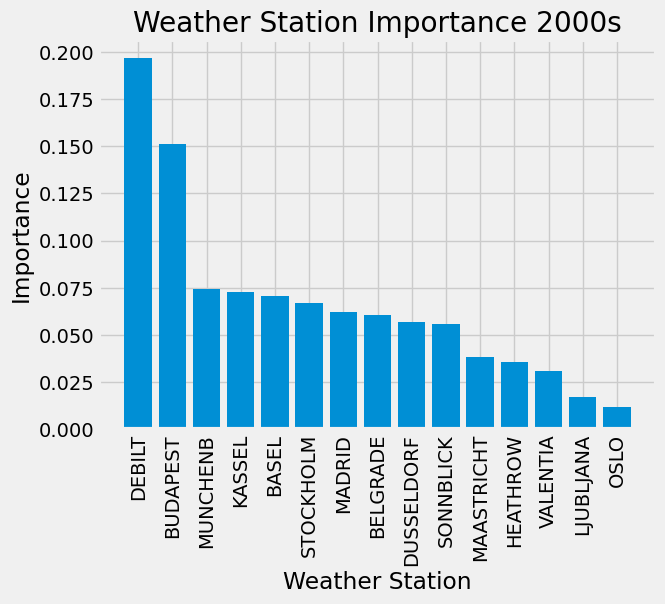


[CV 1/3] END max_depth=10, max_features=135, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=135, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=135, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=135, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.559 total time=   1.9s
[CV 1/3] END max_depth=10, max_features=135, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.581 total time=  19.2s
[CV 1/3] END max_depth=10, max_features=135, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=135, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=135, min_samples_lea

In [75]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2000s')

plt.savefig(os.path.join(path, '2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()